In [0]:
!ls -sl

total 88664
88660 -rw-r--r-- 1 root root 90782802 Jan 17 06:49 cats_and_dogs_small.zip
    4 drwxr-xr-x 1 root root     4096 Jan 13 16:38 sample_data


In [0]:
!unzip cats_and_dogs_small.zip

In [0]:
#input image dir
import os, shutil
base_dir = 'cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(validation_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [0]:
#input keras and create CNN
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu',))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu',))
model.add(layers.MaxPooling2D((2,2)))

Using TensorFlow backend.


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [0]:
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=1e-4), metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)




Epoch 1/30





100/100 [==============================] - 25s 247ms/step - loss: 0.6900 - acc: 0.5340 - val_loss: 0.6748 - val_acc: 0.6100
Epoch 2/30
100/100 [==============================] - 9s 95ms/step - loss: 0.6552 - acc: 0.6105 - val_loss: 0.6369 - val_acc: 0.6610
Epoch 3/30
100/100 [==============================] - 9s 94ms/step - loss: 0.6077 - acc: 0.6725 - val_loss: 0.6268 - val_acc: 0.6530
Epoch 4/30
100/100 [==============================] - 9s 94ms/step - loss: 0.5610 - acc: 0.7140 - val_loss: 0.6112 - val_acc: 0.6600
Epoch 5/30
100/100 [==============================] - 9s 88ms/step - loss: 0.5385 - acc: 0.7245 - val_loss: 0.5963 - val_acc: 0.6900
Epoch 6/30
100/100 [==============================] - 9s 94ms/step - loss: 0.4929 - acc: 0.7730 - val_loss: 0.6101 - val_acc: 0.6790
Epoch 7/30
100/100 [==============================] - 9s 89ms/step - loss: 0.4649 - acc: 0.7880 - val_loss: 0.5825 - val_acc: 0.7050
Epoch 8/30
100/100 [==============================] - 9s 89

In [0]:
model.save('cats_and_dogs_small_1.h5')

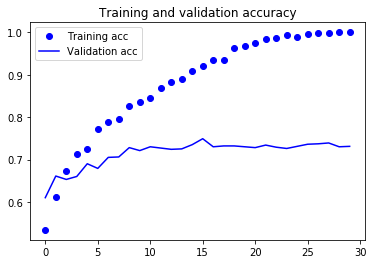

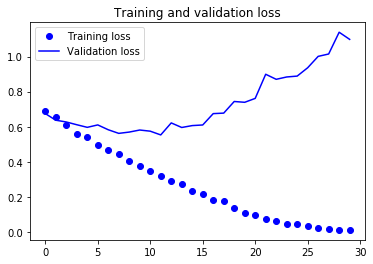

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode ='nearest'
)

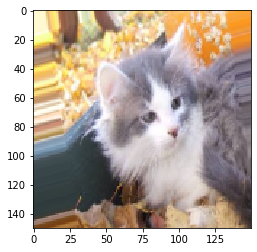

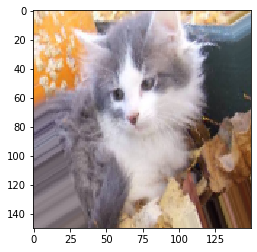

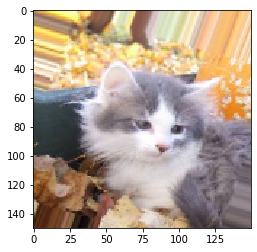

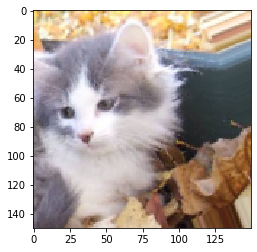

In [0]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size = (150, 150))  
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i+=1
  if i%4 == 0:
    break


In [0]:
from keras import layers
from keras import models
new_model = models.Sequential()
new_model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape =(150, 150, 3)))
new_model.add(layers.MaxPooling2D((3,3)))
new_model.add(layers.Conv2D(128, (3,3), activation='relu'))
new_model.add(layers.MaxPooling2D((2,2)))
new_model.add(layers.Conv2D(256, (3,3), activation='relu'))
new_model.add(layers.MaxPooling2D((2,2)))
new_model.add(layers.Conv2D(256, (3,3), activation='relu'))
new_model.add(layers.MaxPooling2D((2,2)))

new_model.add(layers.Flatten())
new_model.add(layers.Dropout(0.5))
new_model.add(layers.Dense(1024, activation='relu'))
new_model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 47, 47, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 21, 21, 256)       295168    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 10, 10, 256)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 256)        

In [0]:
from keras import optimizers
import numpy as np
new_model.compile(loss = 'binary_crossentropy',
                  optimizer=optimizers.Adam(lr=6.58e-05),
                  metrics=['acc'])


In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [0]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
new_history = new_model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 50
)

Epoch 1/100
100/100 [==============================] - 29s 292ms/step - loss: 0.6927 - acc: 0.5203 - val_loss: 0.6825 - val_acc: 0.5755
Epoch 2/100
100/100 [==============================] - 26s 258ms/step - loss: 0.6773 - acc: 0.5747 - val_loss: 0.6762 - val_acc: 0.5760
Epoch 3/100
100/100 [==============================] - 26s 259ms/step - loss: 0.6705 - acc: 0.5741 - val_loss: 0.6833 - val_acc: 0.5286
Epoch 4/100
100/100 [==============================] - 26s 261ms/step - loss: 0.6627 - acc: 0.5972 - val_loss: 0.6805 - val_acc: 0.5619
Epoch 5/100
100/100 [==============================] - 25s 249ms/step - loss: 0.6406 - acc: 0.6216 - val_loss: 0.6295 - val_acc: 0.6371
Epoch 6/100
100/100 [==============================] - 27s 274ms/step - loss: 0.6199 - acc: 0.6559 - val_loss: 0.5990 - val_acc: 0.6707
Epoch 7/100
100/100 [==============================] - 26s 257ms/step - loss: 0.6027 - acc: 0.6716 - val_loss: 0.5764 - val_acc: 0.6942
Epoch 8/100
100/100 [===========================

In [0]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)
'''
test_loss, test_acc = model.evaluate_generator(test_generator, steps = 50)
print('test acc', test_acc)
'''
new_test_loss, new_test_acc = new_model.evaluate_generator(test_generator, steps = 50)
print('new test acc', new_test_acc)



Found 1000 images belonging to 2 classes.
new test acc 0.8479999995231629


In [0]:
new_model.save('cats_and_dogs_small_3.h5')

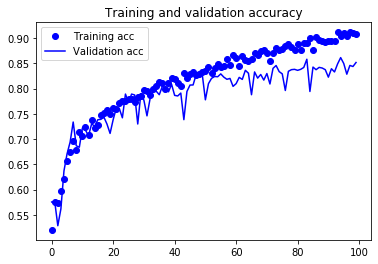

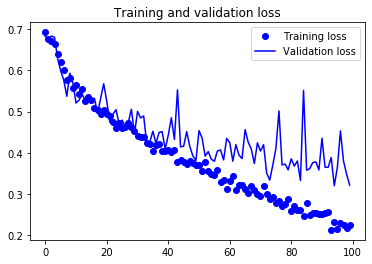

[0.575507614213198, 0.5760309278350515, 0.5285532994923858, 0.5618556701030928, 0.6370558375634517, 0.6707474226804123, 0.6941624365482234, 0.7338917525773195, 0.6868556701030928, 0.684010152284264, 0.7222938144329897, 0.7176395939086294, 0.7068298969072165, 0.7303299492385786, 0.7255154639175257, 0.7384020618556701, 0.7392131979695431, 0.7435567010309279, 0.7296954314720813, 0.711340206185567, 0.7385786802030457, 0.7609536082474226, 0.7607868020304569, 0.7422680412371134, 0.7893041237113402, 0.7728426395939086, 0.7893041237113402, 0.7874365482233503, 0.7300257731958762, 0.7899746192893401, 0.7770618556701031, 0.7461340206185567, 0.7798223350253807, 0.7976804123711341, 0.7950507614213198, 0.7880154639175257, 0.8045685279187818, 0.8015463917525774, 0.7937817258883249, 0.8086340206185567, 0.7867268041237113, 0.7855329949238579, 0.7912371134020618, 0.7385786802030457, 0.7944587628865979, 0.8071065989847716, 0.8073453608247423, 0.8279639175257731, 0.8223350253807107, 0.8273195876288659, 0.

In [0]:
import matplotlib.pyplot as plt

acc = new_history.history['acc']
val_acc = new_history.history['val_acc']
loss = new_history.history['loss']
val_loss = new_history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

print(val_acc)

適切なパラメータを求めるために色々計算

In [0]:
from keras import layers
from keras import models
for i in range(10): 
  new_model = models.Sequential()
  new_model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape =(150, 150, 3)))
  new_model.add(layers.MaxPooling2D((2,2)))
  new_model.add(layers.Conv2D(64, (3,3), activation='relu'))
  new_model.add(layers.MaxPooling2D((2,2)))
  new_model.add(layers.Conv2D(128, (3,3), activation='relu'))
  new_model.add(layers.MaxPooling2D((2,2)))
  new_model.add(layers.Conv2D(128, (3,3), activation='relu'))
  new_model.add(layers.MaxPooling2D((2,2)))

  new_model.add(layers.Flatten())
  new_model.add(layers.Dropout(0.5))
  new_model.add(layers.Dense(512, activation='relu'))
  new_model.add(layers.Dense(1, activation='sigmoid'))

  lr_rate = 10 ** np.random.uniform(-7, -4)
  print('lr_rate:' + str(lr_rate))
  new_model.compile(loss = 'binary_crossentropy',
                  optimizer=optimizers.Adam(lr=lr_rate),
                  metrics=['acc'])
  
  new_history = new_model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 5,
    validation_data = validation_generator,
    validation_steps = 50
)
  val_acc = new_history.history['val_acc']
  print('val_acc' + str(val_acc))

lr_rate:8.54808666577759e-06
Epoch 1/5
100/100 [==============================] - 31s 314ms/step - loss: 0.6933 - acc: 0.5044 - val_loss: 0.6916 - val_acc: 0.5070
Epoch 2/5
100/100 [==============================] - 27s 273ms/step - loss: 0.6909 - acc: 0.5141 - val_loss: 0.6895 - val_acc: 0.5206
Epoch 3/5
100/100 [==============================] - 27s 274ms/step - loss: 0.6891 - acc: 0.5309 - val_loss: 0.6880 - val_acc: 0.4994
Epoch 4/5
100/100 [==============================] - 27s 274ms/step - loss: 0.6873 - acc: 0.5538 - val_loss: 0.6860 - val_acc: 0.5116
Epoch 5/5
100/100 [==============================] - 26s 256ms/step - loss: 0.6840 - acc: 0.5491 - val_loss: 0.6796 - val_acc: 0.5945
val_acc[0.506979695431472, 0.520618556701031, 0.4993654822335025, 0.5115979381443299, 0.5945431472081218]
lr_rate:5.3520141064483326e-05
Epoch 1/5
100/100 [==============================] - 31s 305ms/step - loss: 0.6936 - acc: 0.5063 - val_loss: 0.6885 - val_acc: 0.5742
Epoch 2/5
100/100 [===========

In [0]:
from keras import layers
from keras import models
new_model = models.Sequential()
new_model.add(layers.Conv2D(16, (3,3), activation='relu', input_shape =(150, 150, 3)))
new_model.add(layers.MaxPooling2D((2,2)))
new_model.add(layers.Conv2D(32, (3,3), activation='relu'))
new_model.add(layers.MaxPooling2D((2,2)))
new_model.add(layers.Conv2D(64, (3,3), activation='relu'))
new_model.add(layers.MaxPooling2D((2,2)))
new_model.add(layers.Conv2D(64, (3,3), activation='relu'))
new_model.add(layers.MaxPooling2D((2,2)))

new_model.add(layers.Flatten())
new_model.add(layers.Dropout(0.5))
new_model.add(layers.Dense(512, activation='relu'))
new_model.add(layers.Dense(1, activation='sigmoid'))

new_model.compile(loss = 'binary_crossentropy',
                  optimizer=optimizers.Adam(lr=1e-4),
                  metrics=['acc'])
 
new_history = new_model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 50
)
val_acc = new_history.history['val_acc']
print('val_acc' + str(val_acc))

Epoch 1/20
100/100 [==============================] - 29s 287ms/step - loss: 0.6889 - acc: 0.5219 - val_loss: 0.6816 - val_acc: 0.5266
Epoch 2/20
100/100 [==============================] - 25s 247ms/step - loss: 0.6776 - acc: 0.5656 - val_loss: 0.6510 - val_acc: 0.6250
Epoch 3/20
100/100 [==============================] - 25s 252ms/step - loss: 0.6549 - acc: 0.6034 - val_loss: 0.6305 - val_acc: 0.6434
Epoch 4/20
100/100 [==============================] - 25s 247ms/step - loss: 0.6477 - acc: 0.6097 - val_loss: 0.6208 - val_acc: 0.6482
Epoch 5/20
100/100 [==============================] - 24s 243ms/step - loss: 0.6150 - acc: 0.6581 - val_loss: 0.6842 - val_acc: 0.5768
Epoch 6/20
100/100 [==============================] - 26s 260ms/step - loss: 0.6170 - acc: 0.6572 - val_loss: 0.5873 - val_acc: 0.6753
Epoch 7/20
100/100 [==============================] - 25s 252ms/step - loss: 0.6037 - acc: 0.6675 - val_loss: 0.5762 - val_acc: 0.6808
Epoch 8/20
100/100 [==============================] - 2

In [0]:
from keras import layers
from keras import models
new_model = models.Sequential()
new_model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape =(150, 150, 3)))
new_model.add(layers.MaxPooling2D((2,2)))
new_model.add(layers.Conv2D(128, (3,3), activation='relu'))
new_model.add(layers.MaxPooling2D((2,2)))
new_model.add(layers.Conv2D(256, (3,3), activation='relu'))
new_model.add(layers.MaxPooling2D((2,2)))
new_model.add(layers.Conv2D(256, (3,3), activation='relu'))
new_model.add(layers.MaxPooling2D((2,2)))

new_model.add(layers.Flatten())
new_model.add(layers.Dropout(0.5))
new_model.add(layers.Dense(512, activation='relu'))
new_model.add(layers.Dense(1, activation='sigmoid'))

new_model.compile(loss = 'binary_crossentropy',
                  optimizer=optimizers.Adam(lr=1e-4),
                  metrics=['acc'])
 
new_history = new_model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 50
)
val_acc = new_history.history['val_acc']
print('val_acc' + str(val_acc))

Epoch 1/20
100/100 [==============================] - 33s 328ms/step - loss: 0.6911 - acc: 0.5206 - val_loss: 0.6770 - val_acc: 0.5945
Epoch 2/20
100/100 [==============================] - 27s 269ms/step - loss: 0.6839 - acc: 0.5494 - val_loss: 0.6678 - val_acc: 0.5966
Epoch 3/20
100/100 [==============================] - 27s 273ms/step - loss: 0.6723 - acc: 0.5772 - val_loss: 0.6639 - val_acc: 0.5774
Epoch 4/20
100/100 [==============================] - 27s 271ms/step - loss: 0.6316 - acc: 0.6441 - val_loss: 0.5735 - val_acc: 0.6888
Epoch 5/20
100/100 [==============================] - 26s 260ms/step - loss: 0.6027 - acc: 0.6794 - val_loss: 0.5646 - val_acc: 0.6935
Epoch 6/20
100/100 [==============================] - 28s 280ms/step - loss: 0.5907 - acc: 0.6878 - val_loss: 0.5444 - val_acc: 0.7255
Epoch 7/20
100/100 [==============================] - 27s 271ms/step - loss: 0.5764 - acc: 0.6931 - val_loss: 0.5332 - val_acc: 0.7157
Epoch 8/20
100/100 [==============================] - 2

改良後のネットワーク